<a href="https://colab.research.google.com/github/venkatesh-eranti/covid_tracker/blob/main/covid_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
url='https://api.covid19india.org/states_daily.json'

importing required librariers

In [24]:
import json
import urllib.request
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

 loading the data

In [33]:
urllib.request.urlretrieve(url,'data.json')

('data.json', <http.client.HTTPMessage at 0x7fbeab7b7550>)

In [34]:
with open('data.json') as f:
    data=json.load(f)
data

{'states_daily': [{'an': '0',
   'ap': '1',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dateymd': '2020-03-14',
   'dd': '0',
   'dl': '7',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '14',
   'jh': '0',
   'jk': '2',
   'ka': '6',
   'kl': '19',
   'la': '0',
   'ld': '0',
   'mh': '14',
   'ml': '0',
   'mn': '0',
   'mp': '0',
   'mz': '0',
   'nl': '0',
   'or': '0',
   'pb': '1',
   'py': '0',
   'rj': '3',
   'sk': '0',
   'status': 'Confirmed',
   'tg': '1',
   'tn': '1',
   'tr': '0',
   'tt': '81',
   'un': '0',
   'up': '12',
   'ut': '0',
   'wb': '0'},
  {'an': '0',
   'ap': '0',
   'ar': '0',
   'as': '0',
   'br': '0',
   'ch': '0',
   'ct': '0',
   'date': '14-Mar-20',
   'dateymd': '2020-03-14',
   'dd': '0',
   'dl': '1',
   'dn': '0',
   'ga': '0',
   'gj': '0',
   'hp': '0',
   'hr': '0',
   'jh': '0',
   'jk': '0',
   'ka': '0',
   'kl': '3',
   'la': '0',
   'ld': '0',
   'mh': '0',
   'ml':

In [35]:
data=data['states_daily']

In [36]:
data=pd.DataFrame(data)
data.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,Recovered,1,0,0,4,0,0,0,0


In [29]:
data.shape

(813, 42)

In [37]:
data.drop(columns=['dateymd','tt'],axis=1,inplace=True)

In [47]:
data[data.columns.drop(['date','status'])]=data[data.columns.drop(['date','status'])].apply(pd.to_numeric)

In [48]:
data.head(2)

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,Recovered,0,0,0,0,4,0,0


In [50]:
data['date']=data['date'].apply(pd.to_datetime)

filtering only confirmed cases

In [82]:
df=data.query('status=="Confirmed"')
df.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,un,up,ut,wb
0,0,1,0,0,0,0,0,2020-03-14,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,Confirmed,1,1,0,0,12,0,0
3,0,0,0,0,0,0,0,2020-03-15,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,Confirmed,2,0,0,0,1,0,0
6,0,0,0,0,0,0,0,2020-03-16,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,Confirmed,1,0,0,0,0,1,0
9,0,0,0,0,0,0,0,2020-03-17,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,Confirmed,1,0,0,0,2,0,1
12,0,0,0,0,0,0,0,2020-03-18,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,Confirmed,8,1,0,0,2,1,0


In [83]:
df.shape

(271, 40)

In [84]:
df=pd.melt(df,id_vars='date',value_vars=df.columns.drop(['date','status']),var_name='state',value_name='count')
df.head(3)

,date,state,count
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0


In [67]:
df1=data.query('status=="Deceased"')
df1.head()

,an,ap,ar,as,br,ch,ct,date,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,status,tg,tn,tr,un,up,ut,wb
2,0,0,0,0,0,0,0,2020-03-14,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,2020-03-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,2020-03-17,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,2020-03-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Deceased,0,0,0,0,0,0,0


In [86]:
df1=pd.melt(df1,id_vars='date',value_vars=df1.columns.drop(['date','status']),var_name='state',value_name='count')
df1.head(3)

,date,state,count
0,2020-03-14,an,0
1,2020-03-15,an,0
2,2020-03-16,an,0


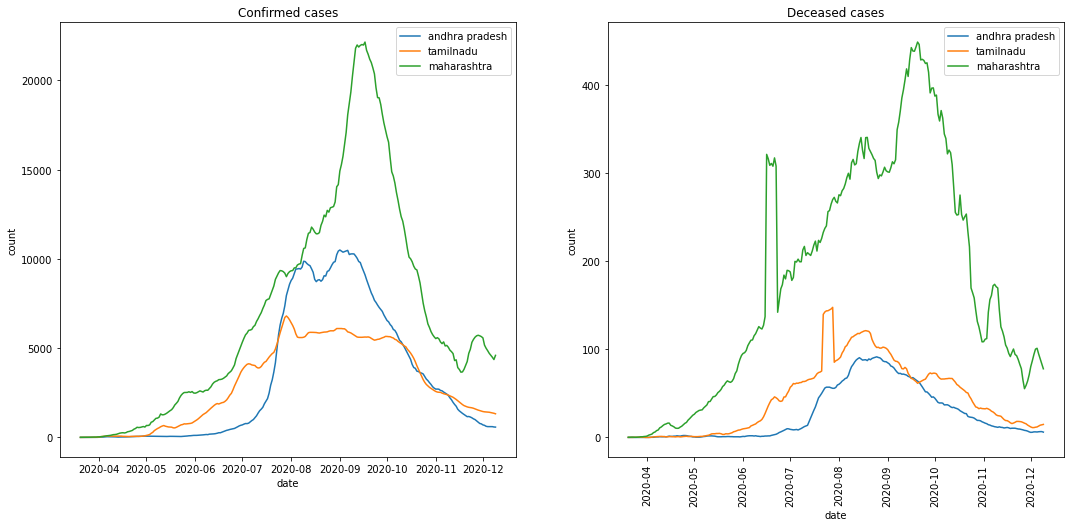

In [100]:
fig,axs=plt.subplots(ncols=2,figsize=(18,8))
ap=df.query('state=="ap"')
tn=df.query('state=="tn"')
mh=df.query('state=="mh"')
ap1=df1.query('state=="ap"')
tn1=df1.query('state=="tn"')
mh1=df1.query('state=="mh"')
sns.lineplot(x=ap['date'],y=ap['count'].rolling(7).mean(),label='andhra pradesh',ax=axs[0])
sns.lineplot(x=tn['date'],y=tn['count'].rolling(7).mean(),label='tamilnadu',ax=axs[0])
sns.lineplot(x=mh['date'],y=mh['count'].rolling(7).mean(),label='maharashtra',ax=axs[0])
axs[0].set_title('Confirmed cases')
sns.lineplot(x=ap['date'],y=ap1['count'].rolling(7).mean(),label='andhra pradesh',ax=axs[1])
sns.lineplot(x=tn['date'],y=tn1['count'].rolling(7).mean(),label='tamilnadu',ax=axs[1])
sns.lineplot(x=mh['date'],y=mh1['count'].rolling(7).mean(),label='maharashtra',ax=axs[1])
plt.xticks(rotation=90)
axs[1].set_title('Deceased cases')
plt.legend()